In [161]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier

import gensim
from gensim import corpora

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [164]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [165]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [166]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [167]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import mannwhitneyu

In [168]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
np.random.seed(42)

In [169]:
pd.set_option('display.max_columns', None)

### Retrieving the data

#### DF 5

In [170]:
df5 = pd.read_csv('df5.csv')

In [171]:
df5.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,target
0,0,1077501.0,1296599.0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,25275,10.0,4,24000.0,2,2011.0,0,1,3160,860,3,27.65,0.0,1985.0,735.0,739.0,1.0,500.0,222.0,3.0,0.0,13648.0,0.837,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015.0,171.62,0.0,2016.0,744.0,740.0,0,0,0,0.0,0.0,0,1
1,1,1077430.0,1314167.0,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,20173,1.0,4,30000.0,1,2011.0,0,0,17558,309,10,1.00,0.0,1999.0,740.0,744.0,5.0,500.0,222.0,3.0,0.0,1687.0,0.094,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013.0,119.66,0.0,2016.0,499.0,0.0,0,0,0,0.0,0.0,0,2


#### DF 5c

In [172]:
df5c = pd.read_csv('df5.csv')

In [173]:
df5c.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,target
0,0,1077501.0,1296599.0,5000.0,5000.0,4975.0,0,0.1065,162.87,1,6,25275,10.0,4,24000.0,2,2011.0,0,1,3160,860,3,27.65,0.0,1985.0,735.0,739.0,1.0,500.0,222.0,3.0,0.0,13648.0,0.837,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,2015.0,171.62,0.0,2016.0,744.0,740.0,0,0,0,0.0,0.0,0,1
1,1,1077430.0,1314167.0,2500.0,2500.0,2500.0,1,0.1527,59.83,2,13,20173,1.0,4,30000.0,1,2011.0,0,0,17558,309,10,1.00,0.0,1999.0,740.0,744.0,5.0,500.0,222.0,3.0,0.0,1687.0,0.094,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,2013.0,119.66,0.0,2016.0,499.0,0.0,0,0,0,0.0,0.0,0,2


#### DF7

In [174]:
#df7 = pd.read_csv('df7.csv')
df7 = pd.read_csv('df8.csv', index_col=0)

In [175]:
df7.head(2)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,purpose,title,addr_state,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,tax_liens,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,zip_code,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,delinq_amnt,pub_rec_bankruptcies,target,content
0,1077501,36months,B,B2,Unknown,10,RENT,Verified,2011,False,credit_card,Computer,AZ,1985,2015,0,2016,False,False,False,False,C0Q1,C1Q1,C2Q2,C3Q3,C4Q2,C5Q0,C6Q7,C7Q9,C8Q0,C9Q7,C10Q7,C11Q0,C12Q3,C13Q0,C14Q0,C15Q0,C16Q6,C17Q8,C18Q0,C19Q0,C20Q0,C21Q2,C22Q3,C23Q2,C24Q3,C25Q0,C26Q0,C27Q0,C28Q1,C29Q7,C30Q7,C31Q0,C32Q0,__label__1,__label__1 1077501 36months B B2 Unknown 10 R...
1,1077430,60months,C,C4,Ryder,1,RENT,Source Verified,2011,False,car,bike,GA,1999,2013,0,2016,False,False,False,False,C0Q0,C1Q0,C2Q0,C3Q7,C4Q0,C5Q0,C6Q3,C7Q0,C8Q0,C9Q7,C10Q7,C11Q3,C12Q3,C13Q0,C14Q0,C15Q0,C16Q1,C17Q1,C18Q0,C19Q0,C20Q0,C21Q0,C22Q0,C23Q0,C24Q1,C25Q0,C26Q1,C27Q1,C28Q1,C29Q0,C30Q0,C31Q0,C32Q0,__label__2,__label__2 1077430 60months C C4 Ryder 1 REN...


# Models

In [176]:
# Initialize lists to store evaluation metrics for each fold
dataset_used = []
model_used = []
data_balancing_technique = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

In [177]:
#combined_metrics = pd.DataFrame()

combined_metrics = pd.DataFrame(columns=['dataset', 'model', 'data balancing technique', 'fold', 'precision_1','precision_2','recall_1','recall_2','f1-score_1','f1-score_2','support_1','support_2','TP','FP','TN','FN'])

# Linear Regression

In [178]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [179]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# Initialize Linear Regression model
linr = LinearRegression()
# Train the model
linr.fit(X_train, y_train)

LinearRegression()

In [181]:
# Predict and evaluate the model
y_pred = linr.predict(X_test)

y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

accuracy = accuracy_score(y_test, y_pred.round())
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [182]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [183]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [184]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [185]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                               u_stat        p_value  effect_size  proportion
last_fico_range_high        3225225.0  2.331498e-136     0.674154    0.060676
last_fico_range_low         3224920.0  2.695465e-136     0.673996    0.060662
recoveries                   699502.5   0.000000e+00    -0.636901    0.057323
last_pymnt_amnt             3110410.5  1.334614e-113     0.614556    0.055312
total_rec_prncp             3084801.0  6.946954e-109     0.601263    0.054115
collection_recovery_fee      809379.0   0.000000e+00    -0.579866    0.052190
total_pymnt                 2978503.0   4.180098e-90     0.546086    0.049149
total_pymnt_inv             2968292.5   2.112482e-88     0.540786    0.048672
last_credit_pull_d          1024956.5   8.349554e-76    -0.467964    0.042118
funded_amnt_inv             2765737.0   4.985058e-58     0.435643    0.039209
funded_amnt                 2750110.5   5.285673e-56     0.427531    0.038479
loan_amnt           

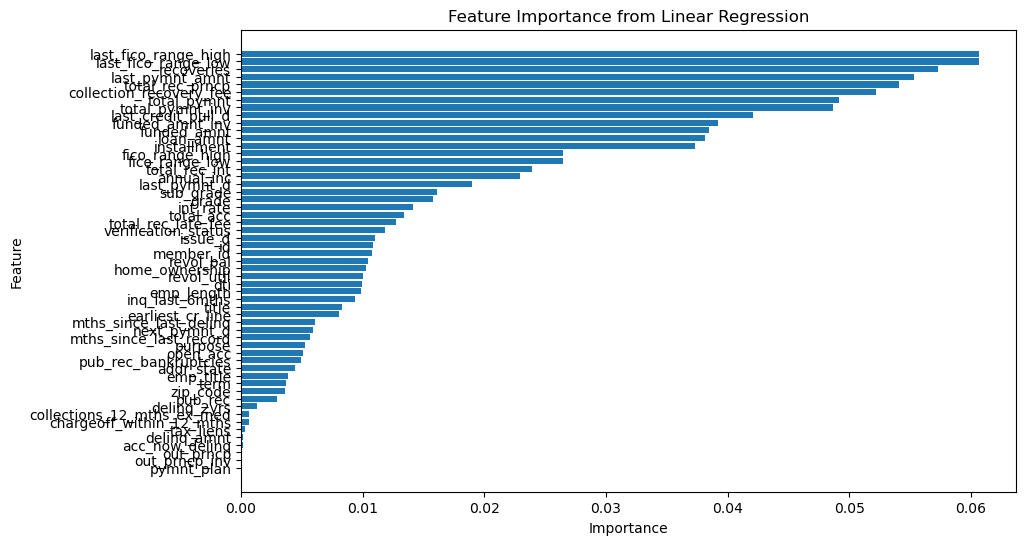

In [186]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [187]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [188]:
results_df.head(20)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,last_fico_range_high,3225225.0,2.331498e-136,0.674154,0.060676,1,Linear Regression
1,last_fico_range_low,3224920.0,2.695465e-136,0.673996,0.060662,2,Linear Regression
2,recoveries,699502.5,0.000000e+00,-0.636901,0.057323,3,Linear Regression
3,last_pymnt_amnt,3110410.5,1.334614e-113,0.614556,0.055312,4,Linear Regression
4,total_rec_prncp,3084801.0,6.946954e-109,0.601263,0.054115,5,Linear Regression
5,collection_recovery_fee,809379.0,0.000000e+00,-0.579866,0.052190,6,Linear Regression
6,total_pymnt,2978503.0,4.180098e-90,0.546086,0.049149,7,Linear Regression
7,total_pymnt_inv,2968292.5,2.112482e-88,0.540786,0.048672,8,Linear Regression
8,last_credit_pull_d,1024956.5,8.349554e-76,-0.467964,0.042118,9,Linear Regression
9,funded_amnt_inv,2765737.0,4.985058e-58,0.435643,0.039209,10,Linear Regression


In [189]:
all_results_df = results_df.copy()

In [190]:
all_results_df.head(2)

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,last_fico_range_high,3225225.0,2.331498e-136,0.674154,0.060676,1,Linear Regression
1,last_fico_range_low,3224920.0,2.695465e-136,0.673996,0.060662,2,Linear Regression


In [191]:
'''
# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'Rank' as a column
transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df.head(2))

'''

"\n# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column\ntransformed_df = results_df.pivot(columns='model', values='feature')\n\n# Reset the index to have a simple enumeration and bring 'Rank' as a column\ntransformed_df = transformed_df.reset_index()\n\n# Display the transformed DataFrame\nprint(transformed_df.head(2))\n\n"

In [192]:
#top_features_df = transformed_df.copy()

# Logistic Regression

In [193]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [194]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
# Initialize Linear Regression model
logr = LogisticRegression()
# Train the model
logr.fit(X_train, y_train)

LogisticRegression()

In [196]:
# Predict and evaluate the model
y_pred = logr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [197]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [198]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [199]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [200]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         537193.5  3.613997e-23     0.655169    0.064917
last_fico_range_high        537179.5  3.637827e-23     0.655126    0.064913
recoveries                  145538.0  1.314500e-54    -0.551577    0.054652
last_pymnt_amnt             498956.5  4.308738e-16     0.537356    0.053243
collection_recovery_fee     150349.0  9.272661e-57    -0.536753    0.053184
funded_amnt_inv             478195.5  7.933457e-13     0.473388    0.046905
last_credit_pull_d          186255.0  5.730912e-12    -0.426122    0.042222
total_pymnt_inv             462680.5  1.205962e-10     0.425584    0.042169
funded_amnt                 431058.5  6.795497e-07     0.328152    0.032515
total_rec_prncp             428505.0  1.254035e-06     0.320285    0.031735
installment                 426365.5  2.076977e-06     0.313693    0.031082
loan_amnt                   424170.5  3.3810

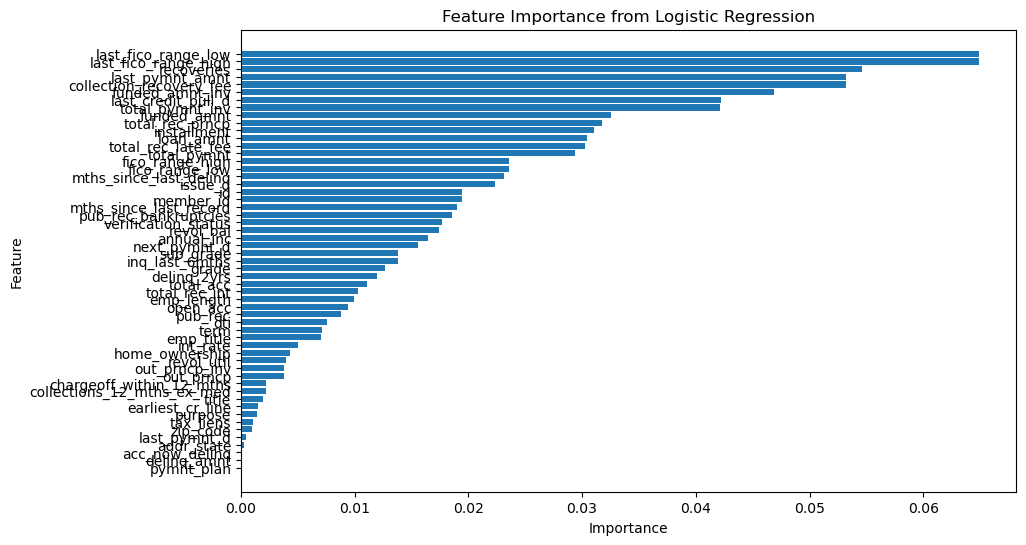

In [201]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

In [202]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Logistic Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [203]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) #

In [204]:
# Display the concatenated DataFrame
print(all_results_df.head(2))

                feature     u_stat        p_value  effect_size  proportion  \
0  last_fico_range_high  3225225.0  2.331498e-136     0.674154    0.060676   
1   last_fico_range_low  3224920.0  2.695465e-136     0.673996    0.060662   

   rank              model  
0     1  Linear Regression  
1     2  Linear Regression  


# Decision Tree Classifier

In [205]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [206]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# Initialize Linear Regression model
dtc = DecisionTreeClassifier()
# Train the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [208]:
# Predict and evaluate the model
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [209]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [210]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [211]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [212]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         556583.5  9.892765e-12     0.407608    0.085314
last_fico_range_high        556580.0  9.903105e-12     0.407599    0.085312
last_pymnt_amnt             533815.0  5.065654e-09     0.350026    0.073262
earliest_cr_line            515264.5  4.002416e-07     0.303111    0.063443
last_credit_pull_d          278960.5  1.495448e-07    -0.294505    0.061641
total_acc                   324264.5  2.649158e-03    -0.179931    0.037660
annual_inc                  338441.0  1.612411e-02    -0.144078    0.030156
total_rec_int               341998.5  2.409105e-02    -0.135081    0.028273
issue_d                     444073.0  2.492867e-02     0.123067    0.025758
next_pymnt_d                351943.5  7.227137e-05    -0.109930    0.023009
recoveries                  438134.0  7.660821e-04     0.108047    0.022615
addr_state                  437996.0  7.1069

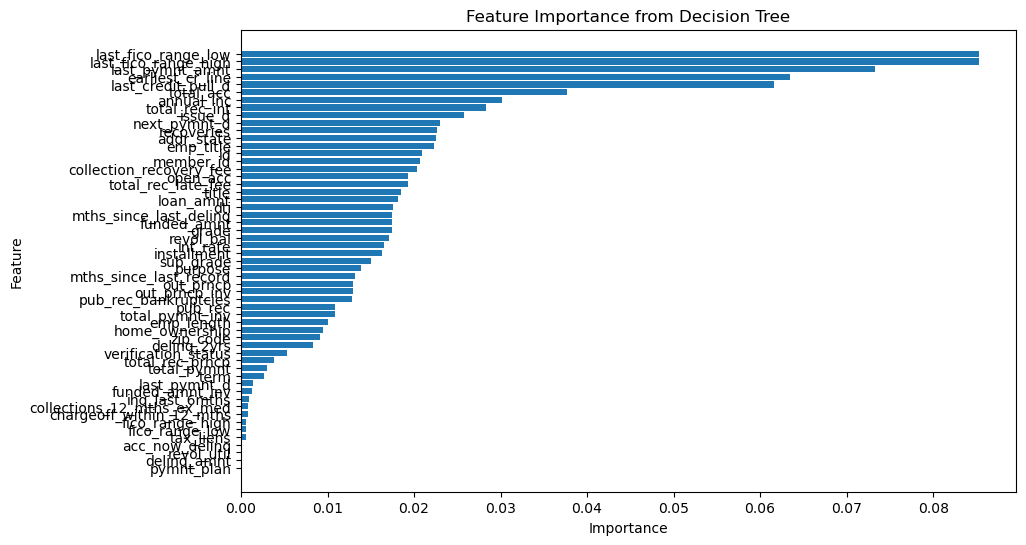

In [213]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Decision Tree')
plt.gca().invert_yaxis()
plt.show()

In [214]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Decision Tree Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [215]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Random Forest

In [216]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [217]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [218]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [219]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [220]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [221]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [222]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [223]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         344476.5  6.693533e-10     0.482066    0.080046
last_fico_range_high        344476.5  6.693629e-10     0.482066    0.080046
last_pymnt_amnt             339376.5  3.841392e-09     0.460123    0.076403
last_credit_pull_d          137604.5  2.415032e-08    -0.407974    0.067743
issue_d                     289599.0  5.898525e-04     0.245962    0.040842
total_pymnt_inv             280129.0  8.604868e-03     0.205219    0.034076
total_rec_int               189882.5  1.909830e-02    -0.183055    0.030396
next_pymnt_d                190472.0  5.835030e-07    -0.180519    0.029975
id                          273686.0  2.305830e-02     0.177499    0.029473
member_id                   273397.0  2.403631e-02     0.176255    0.029267
total_rec_late_fee          192422.0  4.524099e-09    -0.172129    0.028582
total_acc                   195548.0  4.2121

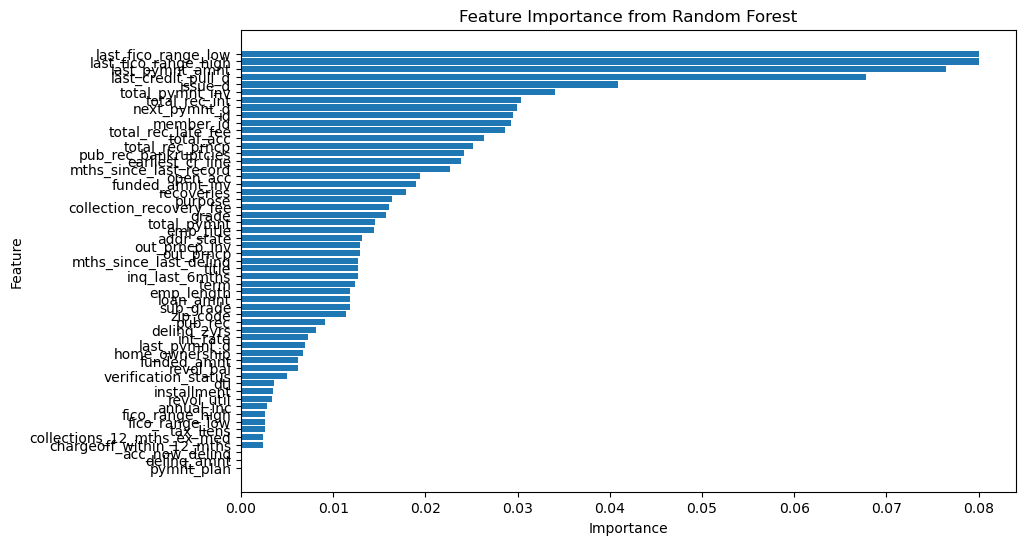

In [224]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [225]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Random Forest Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [226]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Bagged Tree Classifier

In [227]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [228]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [229]:
# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()

# Initialize BaggingClassifier with Decision Tree as base estimator
btc = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)
btc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [230]:
# Predict and evaluate the model
y_pred = btc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [231]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [232]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [233]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [234]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         312816.0  4.712400e-09     0.479560    0.067377
last_fico_range_high        312816.0  4.712461e-09     0.479560    0.067377
last_credit_pull_d          127427.0  2.196189e-07    -0.397295    0.055819
last_pymnt_amnt             294571.5  1.570633e-06     0.393267    0.055253
total_acc                   147279.0  2.104792e-04    -0.303398    0.042626
issue_d                     271719.5  1.447734e-04     0.285182    0.040067
total_rec_int               157330.5  1.783154e-03    -0.255857    0.035947
id                          261755.0  3.652155e-03     0.238051    0.033445
member_id                   261423.0  3.882345e-03     0.236481    0.033225
earliest_cr_line            255337.0  1.109439e-02     0.207695    0.029181
open_acc                    167868.0  1.164967e-02    -0.206016    0.028945
total_rec_late_fee          170550.5  3.3566

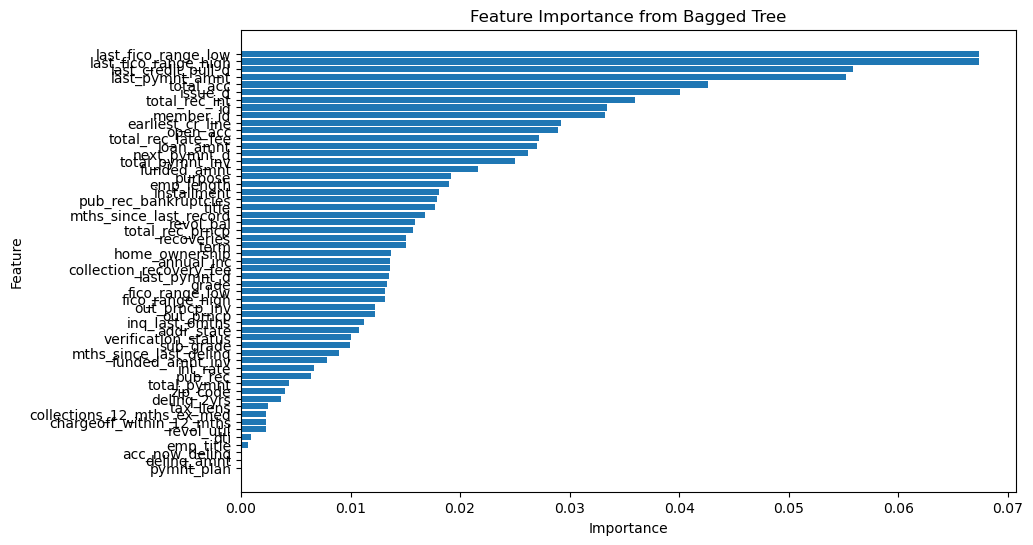

In [235]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Bagged Tree')
plt.gca().invert_yaxis()
plt.show()

In [236]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Bagged Tree Classifier'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [237]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# SVC

In [238]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [239]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [240]:
# Train a Model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [241]:
# Predict and evaluate the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


In [242]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [243]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [244]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [245]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                               u_stat        p_value  effect_size  proportion
last_fico_range_low         7347007.0   0.000000e+00     0.766689    0.082350
last_fico_range_high        7346685.0   0.000000e+00     0.766612    0.082341
recoveries                  1147019.0   0.000000e+00    -0.724183    0.077784
collection_recovery_fee     1441188.0   0.000000e+00    -0.653446    0.070186
total_rec_prncp             6844453.5  3.735611e-268     0.645843    0.069370
last_pymnt_amnt             6310324.5  9.287124e-173     0.517405    0.055574
last_credit_pull_d          2070799.5  1.958557e-185    -0.502048    0.053925
total_pymnt_inv             6239967.0  8.897315e-162     0.500486    0.053757
total_pymnt                 6223359.0  3.078932e-159     0.496493    0.053328
last_pymnt_d                5548965.5   5.808353e-76     0.334325    0.035910
sub_grade                   2891498.5   2.573156e-61    -0.304699    0.032728
grade               

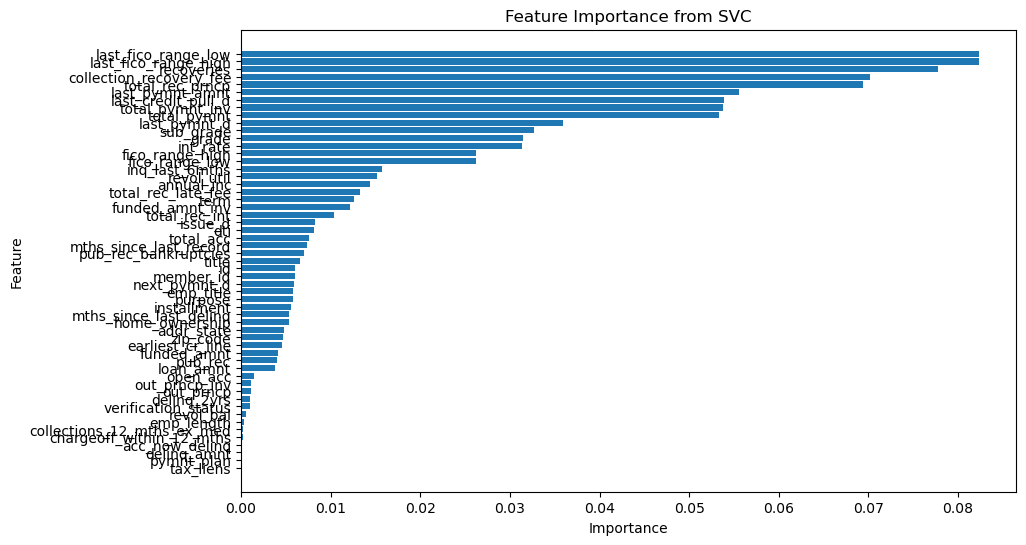

In [246]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from SVC')
plt.gca().invert_yaxis()
plt.show()

In [247]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'SVC'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [248]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# LightGBM

In [249]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [250]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
# Train a Model
lgbmc = lgb.LGBMClassifier()
lgbmc.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 5199, number of negative: 28829
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010234 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6659
[LightGBM] [Info] Number of data points in the train set: 34028, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.152786 -> initscore=-1.712916
[LightGBM] [Info] Start training from score -1.712916


LGBMClassifier()

In [252]:
# Predict and evaluate the model
y_pred = lgbmc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [253]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [254]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [255]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [256]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         141004.0  2.209278e-04     0.445217    0.063632
last_fico_range_high        141004.0  2.209290e-04     0.445217    0.063632
last_pymnt_amnt             136823.5  8.451592e-04     0.402369    0.057508
last_credit_pull_d           59569.5  5.594055e-04    -0.389444    0.055661
total_rec_late_fee           64099.5  3.711253e-14    -0.343014    0.049025
next_pymnt_d                 74092.5  1.599657e-05    -0.240591    0.034386
out_prncp                    77656.0  2.619226e-17    -0.204067    0.029166
out_prncp_inv                77656.0  2.619226e-17    -0.204067    0.029166
issue_d                     116047.0  8.643729e-02     0.189420    0.027073
term                         79802.0  4.494808e-02    -0.182072    0.026022
earliest_cr_line            114909.0  1.397976e-01     0.177757    0.025406
revol_bal                   114338.5  1.5388

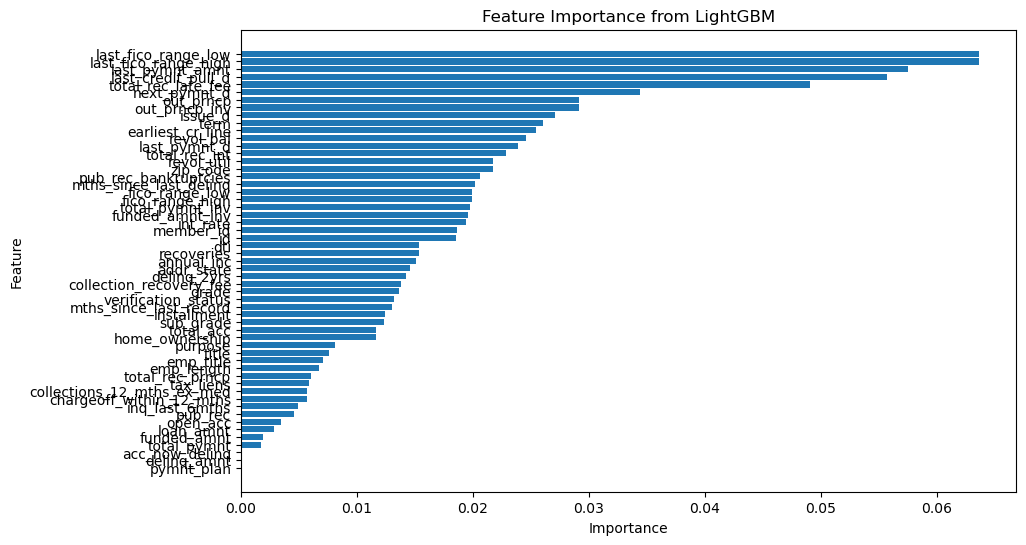

In [257]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from LightGBM')
plt.gca().invert_yaxis()
plt.show()

In [258]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'LightGBM'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [259]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# XGBoost

In [260]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [261]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
# Train a Model
xgbc = XGBClassifier()

## adjust to the y_train and test to be 0,1 istead of 1 and 2
y_train = y_train - 1
y_test = y_test - 1

xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [263]:
# Predict and evaluate the model
y_pred = xgbc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [264]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [265]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [266]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [267]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                              u_stat       p_value  effect_size  proportion
last_fico_range_low         132000.5  1.350054e-04     0.481437    0.069371
last_fico_range_high        132000.5  1.350062e-04     0.481437    0.069371
last_pymnt_amnt             129646.0  3.099549e-04     0.455013    0.065564
last_credit_pull_d           55437.5  1.378335e-03    -0.377827    0.054442
next_pymnt_d                 60909.0  5.871279e-08    -0.316420    0.045594
total_rec_late_fee           63686.5  1.782214e-09    -0.285249    0.041102
funded_amnt_inv             113194.5  3.208186e-02     0.270378    0.038959
total_pymnt_inv             110898.0  5.250954e-02     0.244605    0.035246
out_prncp                    69078.0  5.275603e-19    -0.224740    0.032383
out_prncp_inv                69078.0  5.275603e-19    -0.224740    0.032383
pub_rec_bankruptcies         69927.0  2.072782e-04    -0.215212    0.031010
zip_code                    107610.0  9.9673

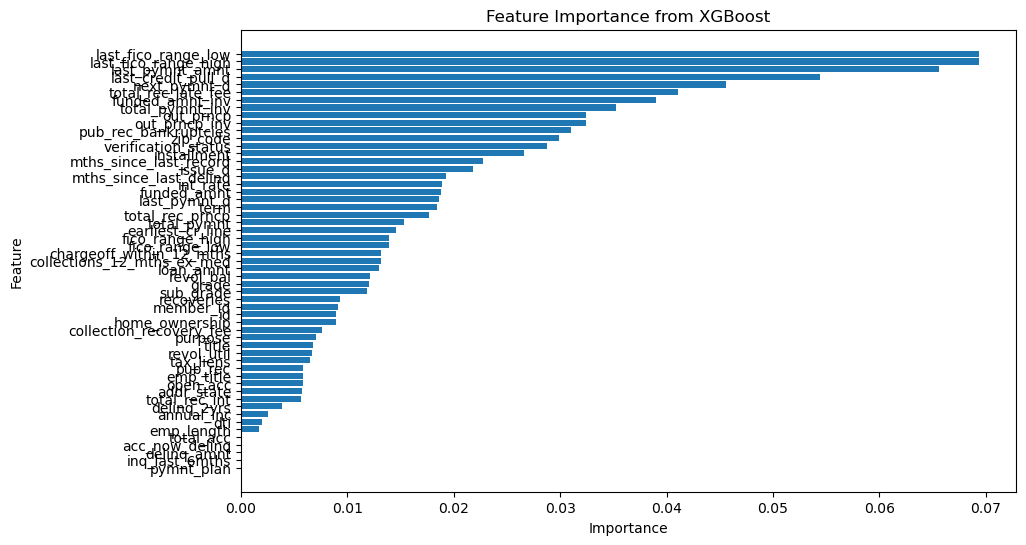

In [268]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from XGBoost')
plt.gca().invert_yaxis()
plt.show()

In [269]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'XGBoost'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [270]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# FastText - train_supervised

In [271]:
import fasttext

In [272]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
#X = df7.drop(columns=['target','content'])  # Drop the target column to get the feature columns
#y = df7['target'].astype(str)  # Target column to predict

X = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
y = '__label__' + df5['target'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a new column "content" by concatenating values from selected columns
X_train['content'] = y_train + ' ' + X_train.apply(lambda row: ' '.join(str(val) for val in row), axis=1)
X_test['content'] = X_test.apply(lambda row: ' '.join(str(val) for val in row), axis=1)

X_train = X_train['content']
X_test = X_test['content']

# Define hyperparameters
dim = 300  # Dimension of word vectors
min_count = 1  # Minimum frequency of words
loss = 'ns'  # Hierarchical softmax loss #'hs', 'ns', 'softmax'
epoch = 100  # Number of training epochs
bucket = 2000000  # Number of buckets used for hashing n-grams
word_ngrams = 1  # Maximum length of word n-grams

lr = 0.5 #0.1, 0.01, 0.001 #learning rate

X_train_list = [value for value in X_train]

# Save training data to a file
with open("train_german_fast_text.txt", "w") as f:
    for line in X_train_list:
        f.write(line + "\n")

# Training data file path
train_data_path = "train_german_fast_text.txt"

# Train the supervised model
model = fasttext.train_supervised(input=train_data_path, dim=dim, minCount=min_count,bucket=bucket, #lr=lr,
                                   loss=loss, epoch=epoch, wordNgrams=word_ngrams) #lr=lr,bucket=bucket,


# Predict on the testing set
# Initialize an empty list to store the predicted labels
y_pred_list = []

# Iterate over each data point in X_test and predict the label
for text in X_test:
    # Predict the label for the current text
    predicted_label, _ = model.predict(text)
    # Append the predicted label to the list
    y_pred_list.append(predicted_label[0])

# Convert the list of predicted labels to a pandas Series
y_pred = pd.Series(y_pred_list)

# Extract the numeric label using a lambda function
y_test = y_test.apply(lambda x: int(x.split("__label__")[1]))  ## uncomment for next run
y_pred = y_pred.apply(lambda x: int(x.split("__label__")[1]))

# Convert y_pred to an array
y_pred = np.array(y_pred)

In [273]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [274]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.92


In [275]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [276]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                               u_stat        p_value  effect_size  proportion
last_fico_range_low         4116734.0  3.367319e-131     0.565907    0.089582
last_fico_range_high        4116660.5  3.468523e-131     0.565879    0.089577
last_credit_pull_d          1645709.0   2.562015e-66    -0.374012    0.059205
last_pymnt_amnt             3487957.0   5.923520e-45     0.326735    0.051721
sub_grade                   1797725.0   2.605635e-42    -0.316189    0.050052
grade                       1798090.0   2.183031e-44    -0.316050    0.050030
int_rate                    1830296.5   4.193501e-39    -0.303799    0.048091
recoveries                  1852238.0  1.995019e-124    -0.295453    0.046770
total_rec_prncp             3378636.0   1.137040e-34     0.285152    0.045139
collection_recovery_fee     2012305.5   8.616386e-87    -0.234567    0.037131
fico_range_high             3178747.0   2.017467e-19     0.209119    0.033103
fico_range_low      

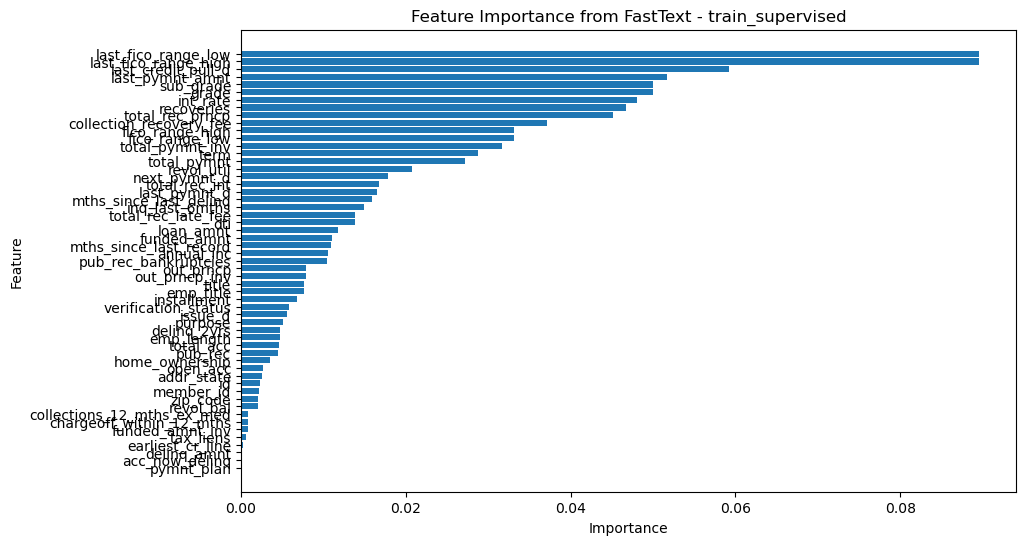

In [277]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from FastText - train_supervised')
plt.gca().invert_yaxis()
plt.show()

In [278]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'FastText - train_supervised'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [279]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# FastText - Linear Regression

In [280]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [281]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
sentences = [sentence.split() for sentence in X_train]

In [283]:
# Train the FastText model
fasttext_model = FastText(sentences, vector_size=100, window=20, min_count=2, workers=4, seed=42)

In [284]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [285]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [286]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [287]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [288]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.97


In [289]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [290]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                               u_stat       p_value  effect_size  proportion
last_fico_range_low         1495829.5  3.105176e-45     0.538983    0.078459
last_fico_range_high        1495798.0  3.143011e-45     0.538950    0.078454
last_pymnt_amnt             1439103.5  2.615713e-36     0.480620    0.069963
total_rec_prncp             1427093.5  1.429274e-34     0.468264    0.068165
total_pymnt_inv             1389426.0  2.451749e-29     0.429509    0.062523
last_credit_pull_d           570832.0  8.153925e-31    -0.412700    0.060076
total_pymnt                 1340744.0  2.971524e-23     0.379423    0.055232
last_pymnt_d                1228042.0  2.110491e-12     0.263470    0.038353
funded_amnt_inv             1158264.0  5.202875e-07     0.191679    0.027902
sub_grade                    822652.5  5.654862e-05    -0.153615    0.022362
grade                        824031.0  4.271927e-05    -0.152197    0.022155
id                          1110

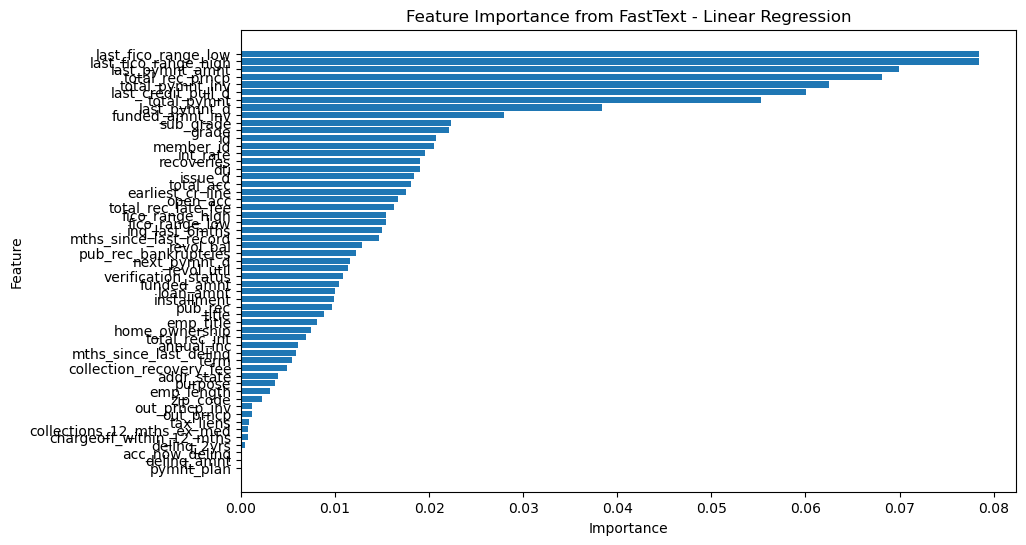

In [291]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from FastText - Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [292]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'FastText - Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [293]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

# Word2Vec - Linear Regression

In [294]:
#df7 = pd.read_csv('df7.csv')
#df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [295]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
sentences = [sentence.split() for sentence in X_train]

In [297]:
# Train the Word2Vec model
Word2Vec_model = Word2Vec(sentences, vector_size=100, window=10, min_count=2, workers=4, seed=42)

In [298]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [Word2Vec_model.wv[word] for word in words if word in Word2Vec_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [299]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [300]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [301]:
## Now that we have the predictions from the Word Embedding method we retrieve the other dataset
## this is the dataset that will be used for the feature importance
## based on the target value and the predicted value

# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [302]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.98


In [303]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
#results_df['importance'] = results_df['effect_size'].abs()
results_df['proportion'] = results_df['effect_size'].abs() / results_df['effect_size'].abs().sum()

# Normalize the importance scores to get proportions
#results_df['proportion'] = results_df['importance'].abs() / results_df['importance'].abs().sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [304]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                               u_stat       p_value  effect_size  proportion
last_fico_range_low         1292662.5  4.800644e-44     0.579239    0.084338
last_fico_range_high        1292627.5  4.870504e-44     0.579196    0.084332
last_pymnt_amnt             1243629.5  9.902450e-36     0.519336    0.075616
total_rec_prncp             1174974.0  1.246683e-25     0.435460    0.063404
last_credit_pull_d           474060.0  3.426391e-27    -0.420843    0.061275
total_pymnt_inv             1158392.0  1.949241e-23     0.415202    0.060454
total_pymnt                 1117041.5  1.920543e-18     0.364684    0.053098
funded_amnt_inv             1002971.5  6.162711e-08     0.225325    0.032808
last_pymnt_d                 957002.5  3.466983e-05     0.169165    0.024631
recoveries                   702048.5  1.812588e-10    -0.142311    0.020721
installment                  926374.5  1.549066e-03     0.131747    0.019183
inq_last_6mths               715

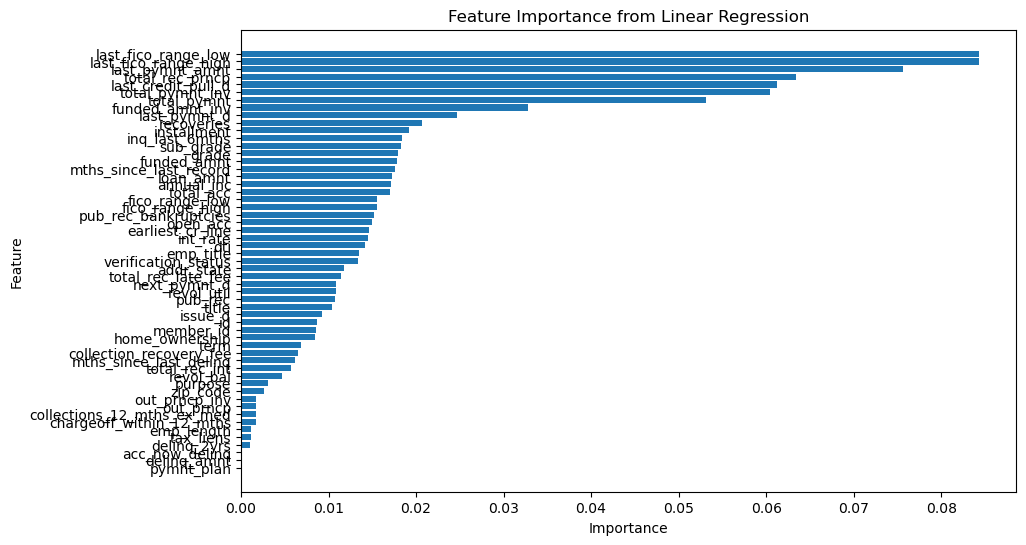

In [305]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(results_df.index, results_df['proportion'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression')
plt.gca().invert_yaxis()
plt.show()

In [306]:
# Add Rank column
results_df['rank'] = range(1, len(results_df) + 1)

# Add Model column with fixed value 'x'
results_df['model'] = 'Word2Vec - Linear Regression'

# First, reset the index to move the current index into a column named 'feature'
results_df = results_df.reset_index().rename(columns={'index': 'feature'})

In [307]:
# Concatenate the dataframes
all_results_df = pd.concat([all_results_df, results_df], ignore_index=True) 

In [308]:
all_results_df

,feature,u_stat,p_value,effect_size,proportion,rank,model
0,last_fico_range_high,3225225.0,2.331498e-136,0.674154,0.060676,1,Linear Regression
1,last_fico_range_low,3224920.0,2.695465e-136,0.673996,0.060662,2,Linear Regression
2,recoveries,699502.5,0.000000e+00,-0.636901,0.057323,3,Linear Regression
3,last_pymnt_amnt,3110410.5,1.334614e-113,0.614556,0.055312,4,Linear Regression
4,total_rec_prncp,3084801.0,6.946954e-109,0.601263,0.054115,5,Linear Regression
...,...,...,...,...,...,...,...
600,tax_liens,812293.5,4.166980e-02,-0.007625,0.001110,51,Word2Vec - Linear Regression
601,delinq_2yrs,812579.0,7.499505e-01,-0.007276,0.001059,52,Word2Vec - Linear Regression
602,acc_now_delinq,819126.0,7.062207e-01,0.000722,0.000105,53,Word2Vec - Linear Regression
603,delinq_amnt,818929.0,7.583860e-01,0.000481,0.000070,54,Word2Vec - Linear Regression


In [309]:
results_df1 = all_results_df.copy()

In [310]:
# Set the index to 'rank'
results_df1.set_index('rank', inplace=True)

# Pivot the DataFrame so that 'model' values become columns and the 'feature' values are listed under each column
transformed_df = results_df1.pivot(columns='model', values='feature')

# Reset the index to have a simple enumeration and bring 'rank' as a column
#transformed_df = transformed_df.reset_index()

# Display the transformed DataFrame
print(transformed_df)

model      Bagged Tree Classifier    Decision Tree Classifier  \
rank                                                            
1             last_fico_range_low         last_fico_range_low   
2            last_fico_range_high        last_fico_range_high   
3              last_credit_pull_d             last_pymnt_amnt   
4                 last_pymnt_amnt            earliest_cr_line   
5                       total_acc          last_credit_pull_d   
6                         issue_d                   total_acc   
7                   total_rec_int                  annual_inc   
8                              id               total_rec_int   
9                       member_id                     issue_d   
10               earliest_cr_line                next_pymnt_d   
11                       open_acc                  recoveries   
12             total_rec_late_fee                  addr_state   
13                      loan_amnt                   emp_title   
14                   next

In [311]:
transformed_df[['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression']].head(5)

model,Word2Vec - Linear Regression,FastText - train_supervised,FastText - Linear Regression
rank,,,
1,last_fico_range_low,last_fico_range_low,last_fico_range_low
2,last_fico_range_high,last_fico_range_high,last_fico_range_high
3,last_pymnt_amnt,last_credit_pull_d,last_pymnt_amnt
4,total_rec_prncp,last_pymnt_amnt,total_rec_prncp
5,last_credit_pull_d,sub_grade,total_pymnt_inv


In [312]:
transformed_df.loc[:, ~transformed_df.columns.isin(['Word2Vec - Linear Regression','FastText - train_supervised','FastText - Linear Regression'])].head(5)

model,Bagged Tree Classifier,Decision Tree Classifier,LightGBM,Linear Regression,Logistic Regression,Random Forest Classifier,SVC,XGBoost
rank,,,,,,,,
1,last_fico_range_low,last_fico_range_low,last_fico_range_low,last_fico_range_high,last_fico_range_low,last_fico_range_low,last_fico_range_low,last_fico_range_low
2,last_fico_range_high,last_fico_range_high,last_fico_range_high,last_fico_range_low,last_fico_range_high,last_fico_range_high,last_fico_range_high,last_fico_range_high
3,last_credit_pull_d,last_pymnt_amnt,last_pymnt_amnt,recoveries,recoveries,last_pymnt_amnt,recoveries,last_pymnt_amnt
4,last_pymnt_amnt,earliest_cr_line,last_credit_pull_d,last_pymnt_amnt,last_pymnt_amnt,last_credit_pull_d,collection_recovery_fee,last_credit_pull_d
5,total_acc,last_credit_pull_d,total_rec_late_fee,total_rec_prncp,collection_recovery_fee,issue_d,total_rec_prncp,next_pymnt_d


In [328]:
transformed_df[['Random Forest Classifier','SVC','XGBoost']].head(5)

model,Random Forest Classifier,SVC,XGBoost
rank,,,
1,last_fico_range_low,last_fico_range_low,last_fico_range_low
2,last_fico_range_high,last_fico_range_high,last_fico_range_high
3,last_pymnt_amnt,recoveries,last_pymnt_amnt
4,last_credit_pull_d,collection_recovery_fee,last_credit_pull_d
5,issue_d,total_rec_prncp,next_pymnt_d


In [313]:
# Group by 'feature' and calculate the mean of all other columns
average_df = all_results_df.drop(columns=['model']).groupby('feature').mean()

# Sort the resulting DataFrame by the 'rank' column in ascending order
average_df = average_df.sort_values(by='rank', ascending=True)

# Reset index to have 'feature' as a column
average_df = average_df.reset_index()

In [314]:
# Display the result
average_df.head(10)

,feature,u_stat,p_value,effect_size,proportion,rank
0,last_fico_range_low,1.772839e+06,0.000032,0.552352,0.075095,1.090909
1,last_fico_range_high,1.772823e+06,0.000032,0.552345,0.075094,1.909091
2,last_pymnt_amnt,1.593147e+06,0.000105,0.459710,0.062674,3.636364
3,last_credit_pull_d,6.028737e+05,0.000176,-0.406430,0.055830,5.181818
4,total_pymnt_inv,1.503685e+06,0.066179,0.302665,0.038560,12.090909
5,recoveries,5.930533e+05,0.042125,-0.180609,0.032408,14.272727
6,total_rec_prncp,1.585947e+06,0.186000,0.291109,0.036385,16.363636
7,total_rec_late_fee,9.444150e+05,0.000004,-0.175863,0.023907,16.363636
8,issue_d,1.177167e+06,0.044978,0.149573,0.020951,18.000000
9,next_pymnt_d,9.849371e+05,0.000019,-0.143588,0.020630,19.363636


In [315]:
data_dictionary = pd.read_csv('data\lcdatadictionary.csv')

In [316]:
data_dictionary.head(2)

,loanstatnew,description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.


In [320]:
# Perform a left join on the 'feature' column from average_df and 'loanstatnew' column from data_dictionary
desc_avg_df = pd.merge(average_df, data_dictionary, how='left', left_on='feature', right_on='loanstatnew') #, right_on='loanstatnew'

In [326]:
desc_avg_df.drop(columns=['loanstatnew']).head(10)

,feature,u_stat,p_value,effect_size,proportion,rank,description
0,last_fico_range_low,1.772839e+06,0.000032,0.552352,0.075095,1.090909,The lower boundary range the borrower’s last F...
1,last_fico_range_high,1.772823e+06,0.000032,0.552345,0.075094,1.909091,The upper boundary range the borrower’s last F...
2,last_pymnt_amnt,1.593147e+06,0.000105,0.459710,0.062674,3.636364,Last total payment amount received
3,last_credit_pull_d,6.028737e+05,0.000176,-0.406430,0.055830,5.181818,The most recent month LC pulled credit for thi...
4,total_pymnt_inv,1.503685e+06,0.066179,0.302665,0.038560,12.090909,Payments received to date for portion of total...
5,recoveries,5.930533e+05,0.042125,-0.180609,0.032408,14.272727,post charge off gross recovery
6,total_rec_prncp,1.585947e+06,0.186000,0.291109,0.036385,16.363636,Principal received to date
7,total_rec_late_fee,9.444150e+05,0.000004,-0.175863,0.023907,16.363636,Late fees received to date
8,issue_d,1.177167e+06,0.044978,0.149573,0.020951,18.000000,The month which the loan was funded
9,next_pymnt_d,9.849371e+05,0.000019,-0.143588,0.020630,19.363636,Next scheduled payment date


In [327]:
#desc_avg_df.head(10)